<a href="https://colab.research.google.com/github/Carolinsrainbow/UC_AnalisisdeDatosEnPython/blob/main/Laboratorio3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 3

Bienvenido al tercer laboratorio del curso Análisis de Datos en Python.

Escribe el código correspondiente para contestar cada una de las preguntas. Fíjate muy bien en el nombre de las variables, ya que de lo contrario, tu trabajo no podrá ser evaluado de manera correcta.

Debes ir ejecutando las celdas de codigo en el orden que aparecen, para evitar tener errores.

El laboratorio consta de dos partes: la primera, que realizarás en este jupyter notebook y la segunda, que se encuentra en el recurso llamado "Laboratorio 3: visualización de datos y asociación (Parte 2)"

In [4]:
## Primero importamos las librerias y los datos que utilizaremos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
base = pd.read_excel('Tarea3.xlsx')

## Parte 1

La primera parte del laboratorio consta de tres preguntas que se detallan a continuación. Sigue las indicaciones de cada pregunta para lograr el puntaje

### Pregunta 1

¿Cuál es la correlación entre ausencias (absences) a clases de un estudiante y las demás variables numéricas de las bases de datos?

Hint: Crea la matriz de correlacion utilizando el metodo `corr()` de pandas y luego extrae solo la columna de correlaciones con la variable `absences`. Almacena la información en la variable `student_corr` de forma directa en como la has calculado

In [5]:
student_corr=None

# your code here
#raise NotImplementedError

correlation_matrix = base.corr(numeric_only=True)
student_corr = correlation_matrix['absences']
print(student_corr)

age           0.175230
Medu          0.100285
Fedu          0.024473
traveltime   -0.012944
studytime    -0.062700
failures      0.063726
famrel       -0.044354
freetime     -0.058078
goout         0.044302
Dalc          0.111908
Walc          0.136291
health       -0.029937
absences      1.000000
G1           -0.031003
G2           -0.031777
G3            0.034247
Name: absences, dtype: float64


Revisemos que las dimensiones sean las correctas. Recuerda que solo deben quedar aquellas variables de tipo numericas

In [6]:
print(student_corr.shape == (16,))

True


Veremos si has calculado correctamente las correlaciones, chequearemos con la misma variable `absences` y tambien con `age`

In [7]:
assert student_corr['absences'] == 1.0, "La correlación de absences es distinta de 1"
assert np.round(student_corr['age'], 3) == 0.175, "La correlación de age es incorrecta"

La siguiente celda contiene test ocultos, que siguen el mismo formato de los anteriores

Ahora contesta: ¿Alguna de estas correlaciones es relevante?

Rellena la variable `existen` con `YES` si hay variables significativas o `NO` si no las hay.

En caso de existir una o más variables significativas, rellena `variable` con el nombre de la variable en formato string que mayor significancia posea, por ejemplo, `TRAVELTIME`.

Si ninguna variable es significativa, rellena `variable = "NO"`

In [8]:
existen=None
variable=None

# your code here
#raise NotImplementedError
variable = 'NO'

In [9]:
print(existen in ["YES", "NO"])
print(variable in list(base.columns)+["NO"])

False
True


### Pregunta 2

Calcula las ausencias promedio según escuela y almacénalo en la variable  'escuela_promedio', no se debe aproximar ni redondear el valor

Calcula las ausencias promedio según género y almacénalo en la variable  'genero_promedio', no se debe aproximar ni redondear el valor

Recuerda aplicar un .reset_index()


In [13]:
escuela_promedio=None
genero_promedio=None

# your code here
# raise NotImplementedError

# Calculamos el promedio de ausencias filtrando por colegio y ausencias,agregamos el reset index para tener el formato que nos piden
escuela_promedio = base.groupby('school')['absences'].mean().reset_index()
print(escuela_promedio)

# Calcular las ausencias promedio según género
genero_promedio = base.groupby('sex')['absences'].mean().reset_index()
print(genero_promedio)


  school  absences
0     GP  5.965616
1     MS  3.760870
  sex  absences
0   F  6.216346
1   M  5.144385


`escuela_promedio` debe ser de la forma:

|   | school	  | absences  |
|---|---|---|
|0 | GP  | XXXXX  |
|1 | MS  | XXXXX  |

`genero_promedio` debe ser de la forma:

|   | sex	  | absences  |
|---|---|---|
|0 | F  | XXXXX  |
|1 | M  | XXXXX  |

In [14]:
list(escuela_promedio.columns) == ['school', 'absences']

## Si esta celda entrega un False, recuerda usar reset_index()

True

Los promedios por escuelas estaran en un test visible:

In [15]:
assert np.round(escuela_promedio[escuela_promedio["school"] == "GP"]["absences"].values,3) == 5.966, "Tus promedios para escuela tipo GP estan incorrectos"
assert np.round(escuela_promedio[escuela_promedio["school"] == "MS"]["absences"].values,3) == 3.761, "Tus promedios para escuela tipo MS estan incorrectos"

Y el siguiente test oculto revisara, siguiendo el mismo formato anterior, los promedios por genero:

### Pregunta 3
Consideremos ahora que el indicador que quiere observar es si un estudiante asistió al colegio **todos los días de clases**.

Construya una tabla de frecuencias de este indicador con respecto a los años de educación de la mamá (`Medu`) y los años de educación del papá del estudiante (`Fedu`). Utilice `Fedu` como columnas y `Medu` como filas

Almacene la tabla en la variable `tabla_student`. La forma de esta tabla debe ser la siguiente:

|Fedu<br>Medu|1<br> |2<br> |3<br> |4<br> |
|---|---|---|---|---|
|0| | | | |
|1| | | | |
|2| | | | |
|3| | | | |
|4| | | | |

Aclaracion: Lo que se debe contar como frecuencia es la cantidad de estudiantes que no faltaron ningún día a clases.

**Hint**: El comando `.crosstab` puede resultarle de utilidad (https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html)

In [34]:
tabla_student=None

# your code here
# raise NotImplementedError

base['asistencia100'] = base['absences'] == 0
tabla_student = pd.crosstab(index=base['Medu'], columns=base['Fedu'], values=base['asistencia100'], aggfunc='sum', dropna=False).fillna(0)
print(tabla_student)


Fedu    0     1     2     3     4
Medu                             
0     0.0   0.0   2.0   0.0   0.0
1     0.0  11.0   3.0   1.0   1.0
2     0.0   9.0  16.0   4.0   2.0
3     0.0   2.0   9.0  10.0   9.0
4     0.0   0.0   4.0  11.0  21.0


 El siguiente test probará la combinación FEDU 1 cruzado con MEDU 0. Es decir, la cantidad de estudiantes con `FEDU=1` y `MEDU=0` y **que no hayan faltado ningun dia a clases**

In [31]:
tabla_student

Fedu,0,1,2,3,4
Medu,,,,,
0,0.0,0.0,2.0,0.0,0.0
1,0.0,11.0,3.0,1.0,1.0
2,0.0,9.0,16.0,4.0,2.0
3,0.0,2.0,9.0,10.0,9.0
4,0.0,0.0,4.0,11.0,21.0


In [32]:
assert tabla_student[1][0] == 0, "Te has equivocado, el valor correcto considerando FEDU 1 y MEDU 0 es 0"

In [33]:
assert tabla_student[1][3] == 2, "Te has equivocado, el valor correcto considerando FEDU 1 y MEDU 3 es 2"

El siguiente test es el real con puntaje, en este se escogen algunos valores al azar de la tabla.

## Parte 2

Bienvenido a la segunda parte del laboratorio.

**IMPORTANTE**: A continuación encontrarás indicaciones para generar visualizaciones de datos. Luego de crear estas visualizaciones, debes guardarlas, ya que deberás usarlas en la segunda parte del laboratorio.

### Pregunta 4

Cree una visualización que le permita observar/comparar qué tan distinta es la calificación en primer grado `G1` de los estudiantes dependiendo de quién es su tutor (guardian)

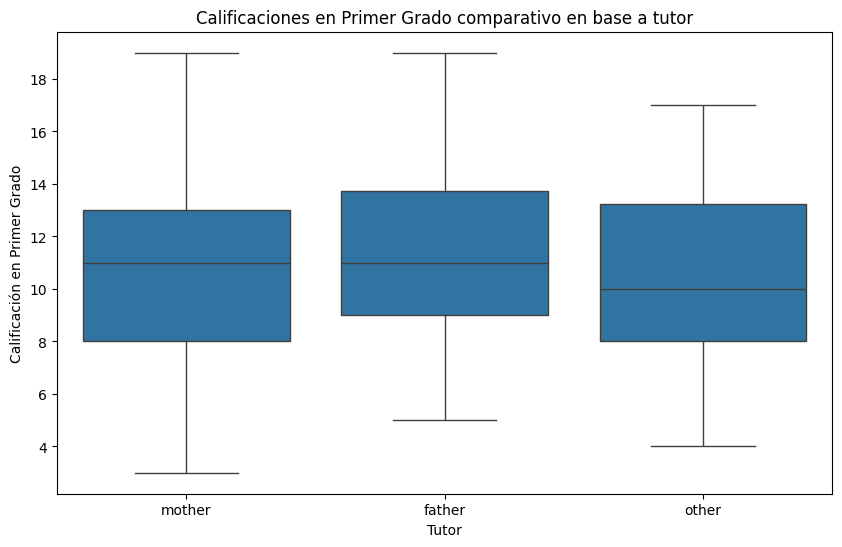

In [37]:
# your code here
#raise NotImplementedError

# Crear el gráfico de caja (boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='guardian', y='G1', data=base)

# Añadir título y etiquetas
plt.title('Calificaciones en Primer Grado comparativo en base a tutor')
plt.xlabel('Tutor')
plt.ylabel('Calificación en Primer Grado')

# Mostrar el gráfico
plt.show()

## Pregunta 5

Cree una visualizacion que permita analizar si hay alguna relacion entre la calificacion en segundo grado `G2` y el tiempo de traslado `traveltime`




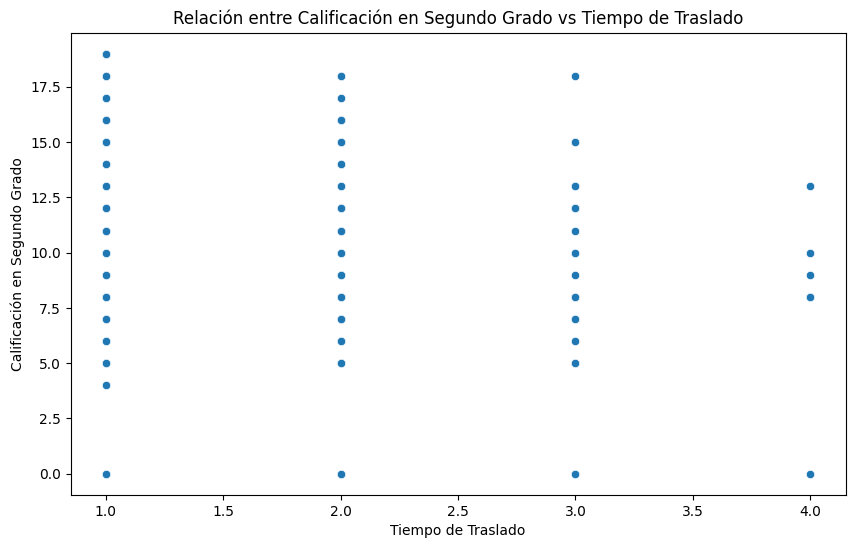

In [40]:
# your code here
# raise NotImplementedError
# Crear el gráfico de dispersión (scatter plot)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='traveltime', y='G2', data=base)

# Añadir título y etiquetas
plt.title('Relación entre Calificación en Segundo Grado vs Tiempo de Traslado')
plt.xlabel('Tiempo de Traslado')
plt.ylabel('Calificación en Segundo Grado')

# Mostrar el gráfico
plt.show()